<a href="https://colab.research.google.com/github/e71828/dig/blob/main/dig5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 大作业

心脏病的主要三种风险因素:高血压、高胆固醇和吸烟。其他影响关键指标包括糖尿病、肥胖(高BMI)、没有进行足够的体育活动或饮酒过量。检测和预防对心脏病影响最大的因素在医疗保健中非常重要。

最初，数据集来自美国疾病控制与预防中心，是行为风险因素监测系统(BRFSS)的主要组成部分，该系统每年进行电话调查，以收集美国居民的健康状况数据。正如CDC所描述的那样:“BRFSS成立于1984年，有15个州，现在收集所有50个州以及哥伦比亚特区和美国3个领地的数据。

**具体要求：**
1.	读取heart_disease_2020数据，输出前5行，观察数据特征。检查数据中是否存在缺失值，利用describe()函数返回数据的统计变量，观察该数据的范围、大小和波动趋势。
2.	分别绘制出患心脏病和不患心脏病的AlcoholDrinking、Race、SkinCancer、PhysicalActivity的柱状图,分析它们分别对心脏病的影响。
3.	分别绘制出患心脏病和不患心脏病的BMI、PhysicalHealth、MentalHealth、SleepTime分布直方图（bins=50）及箱型图，简单分析数据分布情况及其对心脏病的影响。
提示：seaborn中的catplot函数。
4.	对数据进行处理，保留连续的数据BMI、PhysicalHealth、MentalHealth、SleepTime，令患有心脏病label=1，不患有心脏病label=0，保留前2000个样本，方便下面进行分析。
5.	利用SVC、Naive_Bayes、DecisionTreeClassifier构建分类器，衡量哪类模型更符合这个问题。提示：对于SVC模型建立和衡量，借鉴以下的demo的例子,X表示数据，y表示Label。
```python
svc = SVC(kernel='linear')
scores_svc = cross_val_score(svc, X, y, cv=5)
print(f'Mean: {np.mean(scores_svc)}')
print(f'Standard Deviation: {np.std(scores_svc)}')
```
6.	相较于上述三类模型，Logistic Regression是否更符合这个问题,给出评判标准。提示：`sklearn.linear_model.LogisticRegression()`


## 观察特征

In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data = pd.read_csv('heart_disease_2020.csv')
print("Number of Datapoints : ",data.shape[0])
print(data.columns)

Number of Datapoints :  319795
Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [71]:
data.dropna(inplace=True, how='any')  # drop nan values
print(data.isnull().sum().sum()==0)  # check again

True


In [72]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


数据存在bug：
- Physical Health的50%分位点为0.0， 75%分位点为2.0，不足均值；
- Mental Health的50%分位点在0.0，75%分位点在3.0，也比均值小；
- 可以说明 Physical Health和 Mental Health 的数据分布不均衡，大部分很普通，小部分极异常。
- 而BMI 和 SleepTime 的数据均值和中位数较相等，数据分布较均衡。

 ## 离散值柱状图

In [73]:
dd = data.groupby('HeartDisease').agg({'AlcoholDrinking' : lambda x: len(x[x=='Yes']),
                                       'Race' : lambda x: len(x[x=='White']),
                                       'SkinCancer' : lambda x: len(x[x=='Yes']),
                                       'PhysicalActivity' : lambda x: len(x[x=='Yes'])})
dd.rename(columns = {'Race' : r'Race=White'}, inplace = True)
dd.head()

,AlcoholDrinking,Race=White,SkinCancer,PhysicalActivity
HeartDisease,,,,
No,20636,222705,24839,230468
Yes,1141,22507,4980,17489


In [74]:
data_test = data[data['HeartDisease']=='Yes']
data_test['AlcoholDrinking'].value_counts(sort=False, normalize=False)

No     26232
Yes     1141
Name: AlcoholDrinking, dtype: int64

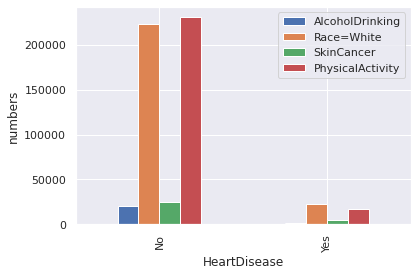

In [75]:
ax = dd.plot.bar()
ax.set_ylabel("numbers")
plt.show()

**AlcoholDrinking、Race、SkinCancer、PhysicalActivity**的影响：
- 没有患上心脏病的人酗酒比率更高。
- 患上心脏病的人白人占比相对较少。
- 患上心脏病的人同时染有皮肤病得占比相对较少，没有患上心脏病的人皮肤病发病率反而较高。
- 患上心脏病的人明显运动较少。

## 连续值柱状图

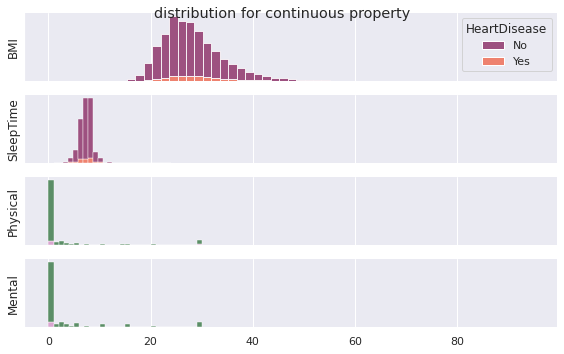

In [76]:
import seaborn as sns

sns.set_theme(style="darkgrid")
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 5), sharex=True)

sns.histplot(data, x="BMI", hue="HeartDisease", multiple="stack", bins=50, ax=ax1, legend=True, palette="rocket",)
sns.histplot(data, x="SleepTime", hue="HeartDisease", multiple="stack", bins=24, ax=ax2, legend=False, palette="rocket",)

sns.histplot(data, x="PhysicalHealth", hue="HeartDisease", multiple="stack", bins=30, ax=ax3, legend=False, palette="cubehelix",)
sns.histplot(data, x="MentalHealth", hue="HeartDisease", multiple="stack", bins=30, ax=ax4, legend=False, palette="cubehelix",)

ax1.set_ylabel("BMI")
ax2.set_ylabel("SleepTime")
ax3.set_ylabel("Physical")
ax4.set_ylabel("Mental")
ax4.set_xlabel("")
# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[],)
plt.tight_layout(h_pad=1)
f.suptitle('distribution for continuous property')
plt.show()

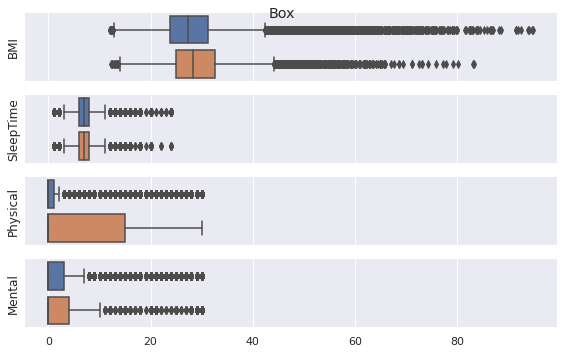

In [77]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 5), sharex=True)

sns.boxplot(y="HeartDisease", x="BMI", data=data, ax=ax1, orient="h",)
sns.boxplot(y="HeartDisease", x="SleepTime", data=data, ax=ax2, orient="h",)
sns.boxplot(y="HeartDisease", x="PhysicalHealth", data=data, ax=ax3, orient="h",)
sns.boxplot(y="HeartDisease", x="MentalHealth", data=data, ax=ax4, orient="h",)

ax1.set_ylabel("BMI")
ax2.set_ylabel("SleepTime")
ax3.set_ylabel("Physical")
ax4.set_ylabel("Mental")
ax4.set_xlabel("")
ax3.set_xlabel("")
ax2.set_xlabel("")
ax1.set_xlabel("")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[],)
plt.tight_layout(h_pad=1)
f.suptitle('Box')
plt.show()

## 数据处理

In [78]:
d_train = data.iloc[0:data.shape[0]//10*3, [0,1,5,6,14]]
d_train['HeartDisease'] = d_train['HeartDisease'].apply(lambda x: 1 if x=='Yes' else 0)
d_test = data.iloc[-data.shape[0]//10:-1, [0,1,5,6,14]]
d_test['HeartDisease'] = d_test['HeartDisease'].apply(lambda x: 1 if x=='Yes' else 0)
d_train.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0,16.60,3.0,30.0,5.0
1,0,20.34,0.0,0.0,7.0
2,0,26.58,20.0,30.0,8.0
3,0,24.21,0.0,0.0,6.0
4,0,23.71,28.0,0.0,8.0


In [79]:
d_train = data.iloc[0:data.shape[0]//10*3, [0,1,5,6,14]]
d_train['HeartDisease'] = d_train['HeartDisease'].apply(lambda x: 1 if x=='Yes' else 0)
d_test = data.iloc[-data.shape[0]//10:-1, [0,1,5,6,14]]
d_test['HeartDisease'] = d_test['HeartDisease'].apply(lambda x: 1 if x=='Yes' else 0)
d_train.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0,16.60,3.0,30.0,5.0
1,0,20.34,0.0,0.0,7.0
2,0,26.58,20.0,30.0,8.0
3,0,24.21,0.0,0.0,6.0
4,0,23.71,28.0,0.0,8.0


## SVM

In [80]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='linear'))
clf.fit(d_train.iloc[:, 1:], d_train['HeartDisease'])
score = clf.score(d_test.iloc[:, 1:], d_test['HeartDisease'])
print("Score of SVC : ", score)

Score of SVC :  0.9136620907470527


## Naive

In [81]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(d_train.iloc[:, 1:], d_train['HeartDisease'])
score = clf.score(d_test.iloc[:, 1:], d_test['HeartDisease'])
print("Score of Naive : ", score)

Score of Naive :  0.8688827042746803


## DecisionTreeClassifier

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(d_train.iloc[:, 1:], d_train['HeartDisease'])
score = clf.score(d_test.iloc[:, 1:], d_test['HeartDisease'])
print("Score of DecisionTreeClassifier : ", score)

Score of DecisionTreeClassifier :  0.8798273867225367


**SVM 和 Naive 和 Dicision tree 的简单对比**
- SVM 的score最大，认为在简单参数下，其分类器模型最优。

## Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
 
lr = make_pipeline(StandardScaler(), LogisticRegression())
lr.fit(d_train.iloc[:, 1:], d_train['HeartDisease'])
score = lr.score(d_test.iloc[:, 1:], d_test['HeartDisease'])
print("Score of Logistic Regression : ",score)

Score of Logistic Regression :  0.9136620907470527


**前三者和 logistic regression 的简单对比**
- SVM 与 logistic regression 的 score 一致，认为在简单参数下，两种分类器没有差别。
- **没有足够证据**，表明 logistic regression 更符合这个问题。

## Use ALL Data

In [84]:
# Converting Gender type to Integers
data.iloc[:,8].replace("Female",1,inplace=True)
data.iloc[:,8].replace("Male",0,inplace=True)

# Categorizing Age values
data.iloc[:,9].replace("18-24",1,inplace=True)
data.iloc[:,9].replace("25-29",2,inplace=True)
data.iloc[:,9].replace("30-34",3,inplace=True)
data.iloc[:,9].replace("35-39",4,inplace=True)
data.iloc[:,9].replace("40-44",5,inplace=True)
data.iloc[:,9].replace("45-49",6,inplace=True)
data.iloc[:,9].replace("50-54",7,inplace=True)
data.iloc[:,9].replace("55-59",8,inplace=True)
data.iloc[:,9].replace("60-64",9,inplace=True)
data.iloc[:,9].replace("65-69",10,inplace=True)
data.iloc[:,9].replace("70-74",11,inplace=True)
data.iloc[:,9].replace("75-79",12,inplace=True)
data.iloc[:,9].replace("80 or older",13,inplace=True)

# Categorize Race of the person 
data.iloc[:,10].replace("White",1,inplace=True)
data.iloc[:,10].replace("Black",2,inplace=True)
data.iloc[:,10].replace("Asian",3,inplace=True)
data.iloc[:,10].replace("American Indian/Alaskan Native",4,inplace=True)
data.iloc[:,10].replace("Other",5,inplace=True)
data.iloc[:,10].replace("Hispanic",6,inplace=True)

# Catgorize if the person is diabetic or not 
data.iloc[:,11].replace("Yes",4,inplace=True)
data.iloc[:,11].replace("Yes (during pregnancy)",3,inplace=True)
data.iloc[:,11].replace("No, borderline diabetes",2,inplace=True)
data.iloc[:,11].replace("No",1,inplace=True)

# Categorize the Health of the person into integers values
data.iloc[:,13].replace("Excellent",4,inplace=True)
data.iloc[:,13].replace("Very good",3,inplace=True)
data.iloc[:,13].replace("Good",2,inplace=True)
data.iloc[:,13].replace("Fair",1,inplace=True)
data.iloc[:,13].replace("Poor",0,inplace=True)

# Set final label of having heart disease or not into integers
data.replace("Yes",1,inplace=True)
data.replace("No",0,inplace=True)

In [85]:
d_train = data.iloc[0:data.shape[0]//10*3, :]
d_test = data.iloc[-data.shape[0]//10:-1, :]

In [86]:
from sklearn.linear_model import LogisticRegression
 
lr = make_pipeline(StandardScaler(), LogisticRegression())
lr.fit(d_train.iloc[:, 1:], d_train['HeartDisease'])
score = lr.score(d_test.iloc[:, 1:], d_test['HeartDisease'])
print("Score of Logistic Regression With all : ",score)

Score of Logistic Regression With all :  0.9144125832577629
